In [ ]:
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
     |████████████████████████████████| 15.4 MB 54.1 MB/s 
     |████████████████████████████████| 6.3 MB 36.5 MB/s 
     |████████████████████████████████| 19.3 MB 7.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon")
comuni =  geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Com01012021_g")
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")
corsi_acqua = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione")
province =  geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g")


1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

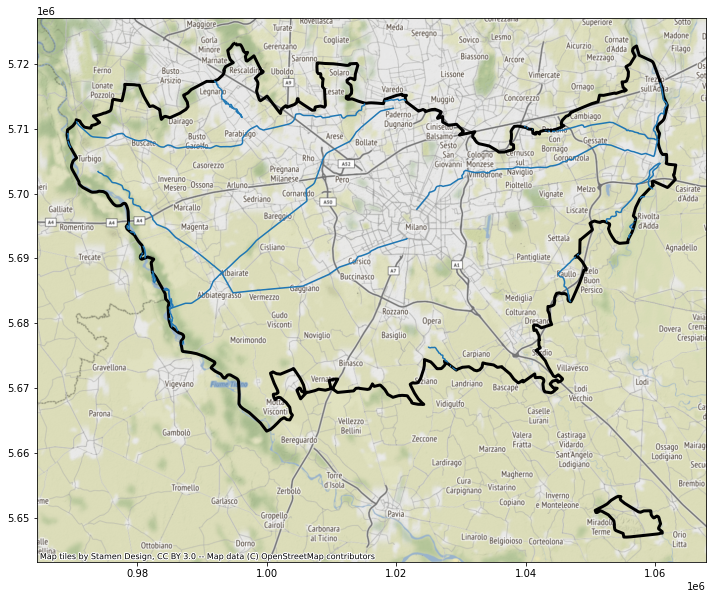

In [ ]:
milano = province[province["DEN_UTS"]== "Milano"]
corsimilano = corsi_acqua[corsi_acqua.intersects(milano.unary_union)]
corsipiulunghi = corsimilano.sort_values(by =  "SHAPE_LEN",ascending = False).head(10)

ax = corsipiulunghi.to_crs(epsg = 3857).plot(figsize=(20,10))
milano.to_crs(epsg = 3857).plot(ax = ax, figsize=(20,10),facecolor = "None",edgecolor = "K",linewidth = 3)
ctx.add_basemap(ax)

2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

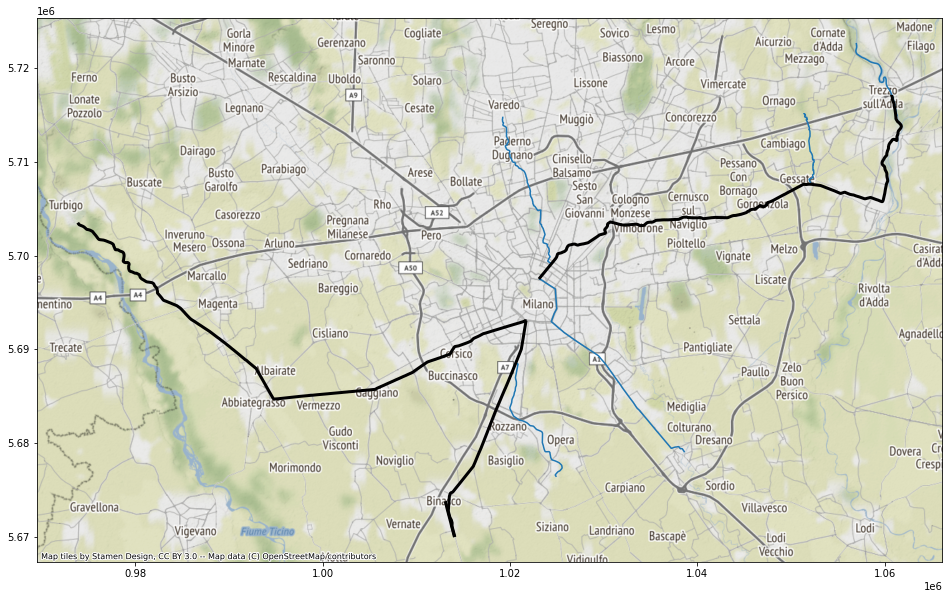

In [ ]:
navigli = corsi_acqua[corsi_acqua.NOME.str.contains("Navigli")]
fiumi = corsi_acqua[corsi_acqua.touches(navigli.unary_union)]
ax = fiumi.to_crs(epsg = 3857).plot(figsize=(20,10),edgecolor )
navigli.to_crs(epsg = 3857).plot(ax = ax, figsize=(20,10),facecolor = "None",edgecolor = "K",linewidth = 3)
ctx.add_basemap(ax)

3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

In [ ]:
comuni = input("inserire comune")
lst = list(comuni["COMUNE"])
if comuni not in lst:
  print("comune inesistente")
else:
  Comu = comuni[comuni.COMUNE == comuni]
  Corsicomuni = comuni[comuni.intersects(Comu.geometry.squeeze())]
  ax = Corsicomuni.to_crs(3857).plot(figsize = (20,12))
  comu.to_crs(epsg = 3857).plot(ax = ax, figsize=(20,10),facecolor = "None",edgecolor = "K",linewidth = 3)
  ctx.add_basemap(ax)


inserire comuneBRESSO


TypeError: ignored

In [ ]:
#come visualizzare solo la parrte di fiyume contenuta nel comune

4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

In [ ]:
user = input("inserire fiume")
lst = list(corsi_acqua["NOME"])
if comuni not in lst:
  print("fiume inesistente")
else:
  Fiume = corsi_acqua[corsi_acqua.NOME == user]
  CorsiFiumi = comuni[comuni.intersects(Fiume.geometry.squeeze())]
  ax = CorsiFiumi.to_crs(3857).plot(figsize = (20,12),edgecolor = "K")
  Fiume.to_crs(epsg = 3857).plot(ax = ax, figsize=(20,10),facecolor = "None",edgecolor = "K",linewidth = 3)
  ctx.add_basemap(ax)

KeyboardInterrupt: ignored